<a href="https://colab.research.google.com/github/mohitsbh/Ai_Learn_codes/blob/main/Nnfs9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

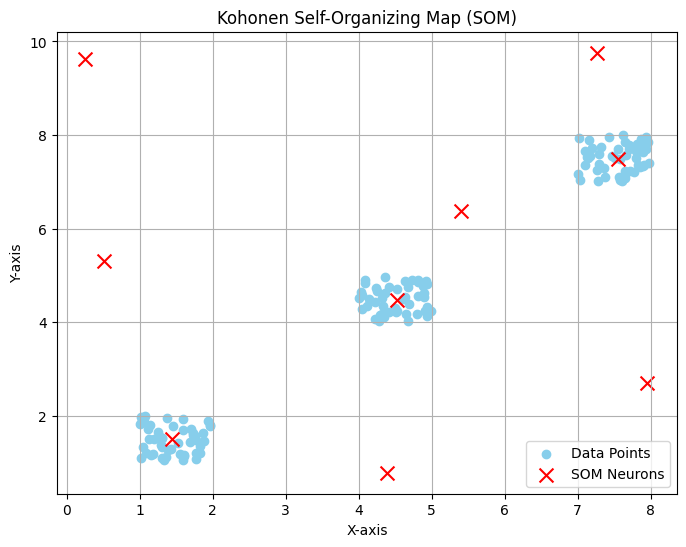

In [2]:
# NNFS 9 - Kohonen Self-Organizing Map (SOM)
# Equivalent of your Scilab code, written for Google Colab

import numpy as np
import matplotlib.pyplot as plt

# 1. Generate sample data (3 clusters in 2D)
np.random.seed(42)
data = np.vstack([
    np.random.rand(50, 2) + 1,
    np.random.rand(50, 2) + 4,
    np.random.rand(50, 2) + 7
])

n_samples, n_features = data.shape

# 2. SOM parameters
rows, cols = 3, 3    # SOM grid size (3x3 neurons)
alpha = 0.5          # Initial learning rate
epochs = 100         # Number of training iterations

# 3. Initialize SOM weights randomly in the same 2D space
som_weights = np.random.rand(rows * cols, n_features) * 10

# 4. Function to compute Euclidean distance
def dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# 5. Training SOM
for epoch in range(epochs):
    for i in range(n_samples):
        x = data[i]

        # Find Best Matching Unit (BMU)
        distances = np.linalg.norm(som_weights - x, axis=1)
        bmu_index = np.argmin(distances)

        # Update BMU weights
        som_weights[bmu_index] += alpha * (x - som_weights[bmu_index])

    # Gradually reduce learning rate
    alpha *= 0.95

# 6. Plot data and SOM neurons
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='skyblue', label='Data Points')
plt.scatter(som_weights[:, 0], som_weights[:, 1], c='red', marker='x', s=100, label='SOM Neurons')
plt.title("Kohonen Self-Organizing Map (SOM)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()